<a href="https://colab.research.google.com/github/2303a52163/SML_2303a52163/blob/main/SML12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Question 1:**

https://www.kaggle.com/datasets/kellistephenson/increasing-breast-cancer-awarenessLinks



**1.Read the data with pandas and find** **features and target variables**

**2.Find target variable**

**3.Train SVM, KNN, Logistic regression and find accuracy**

**4.Draw bootstrapping plots for each model**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.utils import resample

In [ ]:
data = pd.read_csv('/content/breast_cancer_survival (1).csv')
data.head

<bound method NDFrame.head of      Age  Gender  Protein1  Protein2  Protein3  Protein4 Tumour_Stage  \
0     42  FEMALE  0.952560   2.15000  0.007972 -0.048340           II   
1     54  FEMALE  0.000000   1.38020 -0.498030 -0.507320           II   
2     63  FEMALE -0.523030   1.76400 -0.370190  0.010815           II   
3     78  FEMALE -0.876180   0.12943 -0.370380  0.132190            I   
4     42  FEMALE  0.226110   1.74910 -0.543970 -0.390210           II   
..   ...     ...       ...       ...       ...       ...          ...   
329   59  FEMALE  0.024598   1.40050  0.024751  0.280320           II   
330   41  FEMALE  0.100120  -0.46547  0.472370 -0.523870            I   
331   54  FEMALE  0.753820   1.64250 -0.332850  0.857860           II   
332   74  FEMALE  0.972510   1.42680 -0.366570 -0.107820           II   
333   66  FEMALE  0.286380   1.39980  0.318830  0.836050           II   

                          Histology ER status PR status HER2 status  \
0     Infiltrating Ductal Carcinoma  Positive  Positive    Negative   
1     Infiltrating Ductal Carcinoma  Positive  Positive    Negative   
2     Infiltrating Ductal Carcinoma  Positive  Positive    Negative   
3     Infiltrating Ductal Carcinoma  Positive  Positive    Negative   
4     Infiltrating Ductal Carcinoma  Positive  Positive    Positive   
..                              ...       ...       ...         ...   
329   Infiltrating Ductal Carcinoma  Positive  Positive    Positive   
330   Infiltrating Ductal Carcinoma  Positive  Positive    Positive   
331   Infiltrating Ductal Carcinoma  Positive  Positive    Negative   
332  Infiltrating Lobular Carcinoma  Positive  Positive    Negative   
333   Infiltrating Ductal Carcinoma  Positive  Positive    Negative   

                    Surgery_type Date_of_Surgery Date_of_Last_Visit  \
0                          Other       20-May-18          26-Aug-18   
1                          Other       26-Apr-18          25-Jan-19   
2                     Lumpectomy       24-Aug-18          08-Apr-20   
3                          Other       16-Nov-18          28-Jul-20   
4                     Lumpectomy       12-Dec-18          05-Jan-19   
..                           ...             ...                ...   
329                   Lumpectomy       15-Jan-19          27-Mar-20   
330  Modified Radical Mastectomy       25-Jul-18          23-Apr-19   
331            Simple Mastectomy       26-Mar-19          11-Oct-19   
332                   Lumpectomy       26-Nov-18          05-Dec-18   
333  Modified Radical Mastectomy       04-Feb-19          10-Aug-19   

    Patient_Status  
0            Alive  
1             Dead  
2            Alive  
3            Alive  
4            Alive  
..             ...  
329          Alive  
330          Alive  
331           Dead  
332          Alive  
333           Dead  

[334 rows x 15 columns]>

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = le.fit_transform(data[column])

data.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,42,0,0.95256,2.15000,0.007972,-0.048340,1,0,0,0,0,2,118,238,0
1,54,0,0.00000,1.38020,-0.498030,-0.507320,1,0,0,0,0,2,155,228,1
2,63,0,-0.52303,1.76400,-0.370190,0.010815,1,0,0,0,0,0,137,62,0
3,78,0,-0.87618,0.12943,-0.370380,0.132190,0,0,0,0,0,2,101,270,0
4,42,0,0.22611,1.74910,-0.543970,-0.390210,1,0,0,0,1,0,66,37,0


In [ ]:
data.dtypes

,0
Age,int64
Gender,int64
Protein1,float64
Protein2,float64
Protein3,float64
Protein4,float64
Tumour_Stage,int64
Histology,int64
ER status,int64
PR status,int64


In [ ]:
data.isnull().sum()

,0
Age,0
Gender,0
Protein1,0
Protein2,0
Protein3,0
Protein4,0
Tumour_Stage,0
Histology,0
ER status,0
PR status,0


In [ ]:
X=data.drop(['Patient_Status','Date_of_Surgery','Date_of_Last_Visit','ER status','PR status'],axis=1)
y=data['Patient_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
svm=SVC()
knn=KNeighborsClassifier()
lr=LogisticRegression()

svm.fit(X_train,y_train)
knn.fit(X_train,y_train)
lr.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
svm_accuracy = accuracy_score(y_test, svm.predict(X_test))
knn_accuracy = accuracy_score(y_test, knn.predict(X_test))
log_reg_accuracy = accuracy_score(y_test, lr.predict(X_test))

print("SVM Accuracy:", svm_accuracy)
print("KNN Accuracy:", knn_accuracy)
print("Logistic Regression Accuracy:", log_reg_accuracy)

SVM Accuracy: 0.7761194029850746
KNN Accuracy: 0.7313432835820896
Logistic Regression Accuracy: 0.7761194029850746


In [ ]:
def bootstrap_accuracy(model, X, y,Xt,yt, n_iterations=100):
    bootstrapped_accuracies = []
    for _ in range(n_iterations):
        X_resampled, y_resampled = resample(X, y)
        model.fit(X_resampled, y_resampled)
        accuracy = accuracy_score(yt, model.predict(Xt))
        bootstrapped_accuracies.append(accuracy)
    return bootstrapped_accuracies

In [ ]:
n_iterations = 100
svm_accuracies = bootstrap_accuracy(svm, X_train, y_train,X_test,y_test, n_iterations)
knn_accuracies = bootstrap_accuracy(knn, X_train, y_train,X_test,y_test, n_iterations)
log_reg_accuracies = bootstrap_accuracy(lr, X_train, y_train,X_test,y_test, n_iterations)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

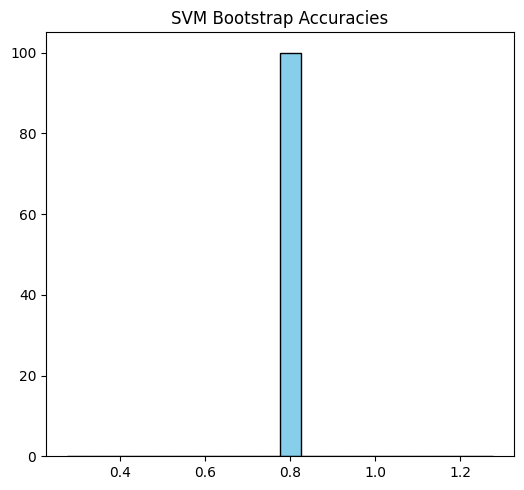

In [ ]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.hist(svm_accuracies, bins=20, color='skyblue', edgecolor='black')
plt.title("SVM Bootstrap Accuracies")
plt.tight_layout()
plt.show()

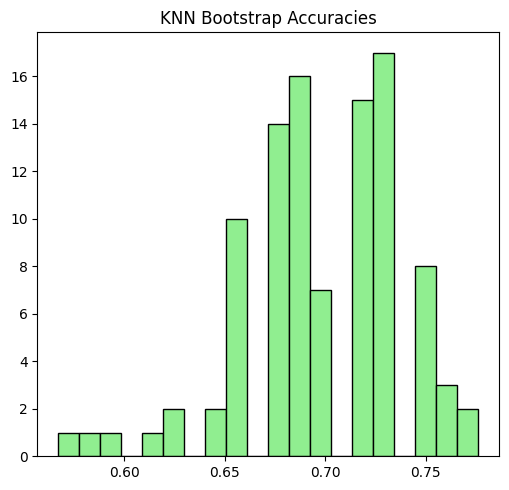

In [ ]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 2)
plt.hist(knn_accuracies, bins=20, color='lightgreen', edgecolor='black')
plt.title("KNN Bootstrap Accuracies")
plt.tight_layout()
plt.show()

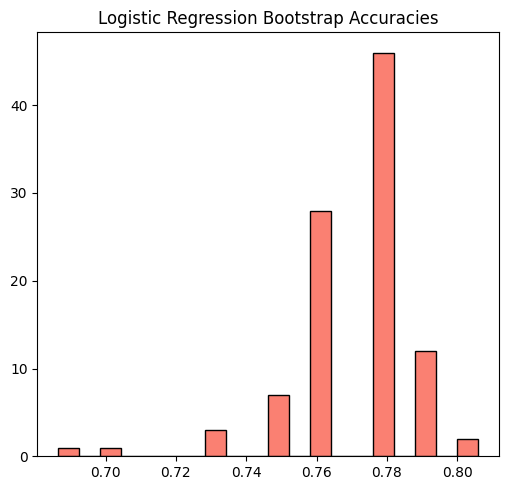

In [ ]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 3)
plt.hist(log_reg_accuracies, bins=20, color='salmon', edgecolor='black')
plt.title("Logistic Regression Bootstrap Accuracies")
plt.tight_layout()
plt.show()